# Итоговый проект Detection
**Сценарий № 1**



## 1. Выбор фреймворка/библиотеки для использования детектора

Для проекта использован **torchhub** модель предобученная модель **yolov5** от **ultralytics**  
https://github.com/ultralytics/yolov5

In [3]:
# Необходимые библиотеки для работы с моделью
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [5]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Евгений/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-23 Python-3.9.12 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## 2. Запуск детектора на случайных изображениях
В папке "image" лежат 12 фотографий взятых из поисковика по запросу "люди", есть возможность загрузить сколько угодно своих и проверить модель

In [6]:

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os
import math

In [7]:
PATH_IMG = "image"
list_img = os.listdir(PATH_IMG)

In [62]:
def edit_foto(table_class, image_pil):
    '''Функция создания областей рамок по переданным координатам'''
    image = image_pil.convert("RGBA")
    image2 = Image.new('RGBA', (image.width, image.height))
    size_max = max(image2.size)
    size_border = math.ceil(size_max * 0.008)
    tempDraw = ImageDraw.Draw(image2)
    for row in range(len(table_class)):
        tempDraw.rectangle([(table_class.iloc[row, 0], table_class.iloc[row, 1]),
                            (table_class.iloc[row, 2], table_class.iloc[row, 3])],
                           outline="red", width=size_border)
        image.paste(image2, (0, 0), image2)
    return image

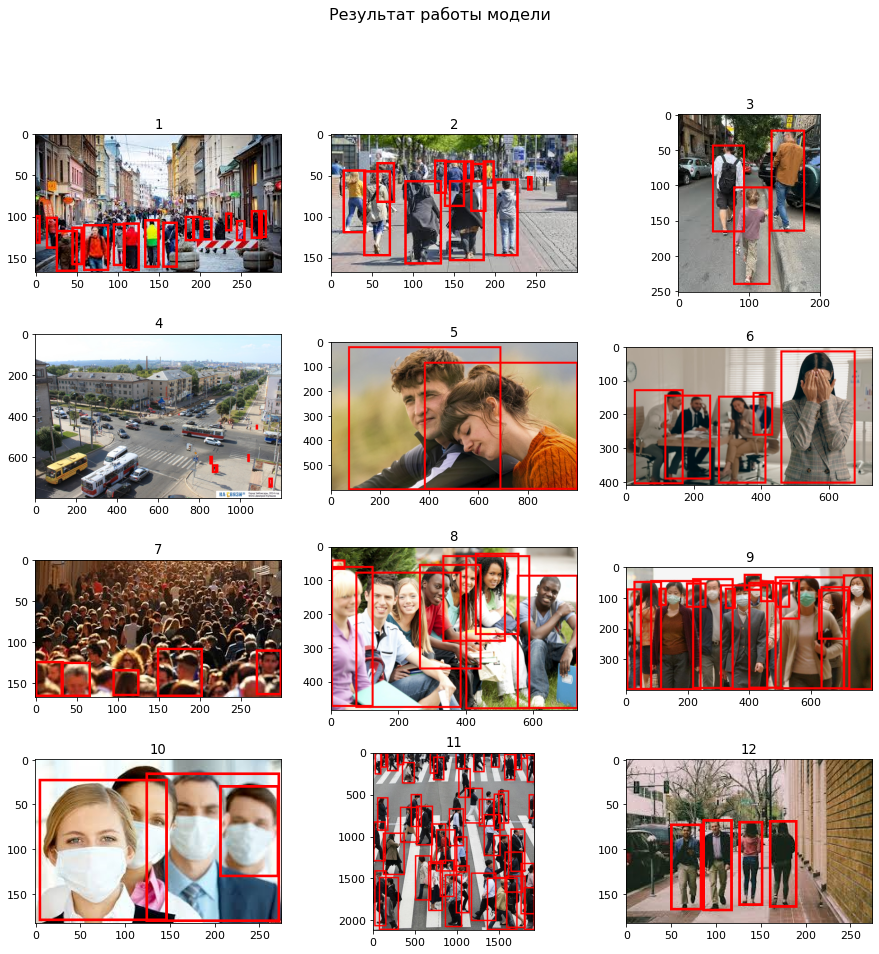

In [63]:
columns = 3
rows = math.ceil(len(list_img) // columns)

fig, ax = plt.subplots(rows , columns, figsize = (15,15))

for img_ind, img in enumerate(list_img):
    '''Детекция на тестовых изображениях для обзора модели'''
    img_pil = Image.open(f'{PATH_IMG}/{img}')
    result_model = model(img_pil)
    table_class = result_model.pandas().xyxy[0]
    table_class = table_class[table_class["class"] == 0]
    final_img = edit_foto(table_class, img_pil)
    ax[img_ind // columns , img_ind % columns].imshow(final_img)
    ax[img_ind // columns , img_ind % columns].set_title(img_ind + 1)
fig.suptitle("Результат работы модели", fontsize=16)
plt.show()

## 3. Выбор фреймворка/библиотеки 

Для разработки веб-приложения использовна библиотека Streamlit  
https://streamlit.io/

## 4 - 5. Разработки и встраивание модели в демо

Пункты 4 и 5 объеденены. Рабочий код программы небольшой, предлагаю результат сразу. 

In [ ]:
import io
import streamlit as st
from PIL import Image, ImageDraw
import torch

def load_image():
    """Загрузка изображения средством streamlit"""
    uploaded_file = st.file_uploader(
        label='Выберите изображение для детекции')
    if uploaded_file is not None:
        image_data = uploaded_file.getvalue()
        st.image(image_data)
        return Image.open(io.BytesIO(image_data))
    else:
        return None

def edit_foto(table_class, image_pil):
    '''Функция создания областей рамок по переданным координатам'''
    image = image_pil.convert("RGBA")
    image2 = Image.new('RGBA', (image.width, image.height))
    tempDraw = ImageDraw.Draw(image2)
    for row in range(len(table_class)):
        tempDraw.rectangle([(table_class.iloc[row, 0], table_class.iloc[row, 1]),
                            (table_class.iloc[row, 2], table_class.iloc[row, 3])],
                           fill=(0, 0, 255, 150),
                           outline="red")
    image.paste(image2, (0, 0), image2)
    return image

@st.cache
def load_model():
    '''Загрузка модели'''
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', trust_repo=True)
    return model

def main():
    page_list = ["О проекте", "Детекция"]
    st.sidebar.markdown("# Меню")
    page = st.sidebar.selectbox("Выберите страницу:", page_list)

    if page == page_list[0]:
        '''Страница о проекте'''
        st.markdown('## Итоговый проект по теме: "Detection"')
        st.image('logo_DLS.jpg', width=300)
        st.markdown("*Deep Learning (семестр 1, осень 2022): базовый поток*")
        st.markdown('#### Автор работы: [Евгений Сомов](https://t.me/evgeny_somov)')
        st.markdown('В данной работе встроена предобученная модель для детекции'
                    ' [YOLO-v5 от Ultralytics](https://github.com/ultralytics/yolov5).  \n'
                    'Модель настроена для определения людей на фотографиях. Веб-приложение создано '
                    'на базе библиотеки [Streamlit](https://streamlit.io). На следующей странице вы сможете '
                    'протестировать модель детекции.')
        
    elif page == page_list[1]:
        '''Страница детекции'''
        st.title('Детекция людей на изображениях')
        original_imag_pil = load_image()
        st.text('После загрузки и появления исходного изображения нажмите кнопку "Детекция"')
        result = st.button('Детекция')
        
        '''Обработка изображения после нажатия кнопки Детекция'''
        if result and original_imag_pil is not None:
            #Встраивание модели
            model = load_model()
            result_predict = model(original_imag_pil)
            #Получение координат классов
            table_class = result_predict.pandas().xyxy[0]
            #Отсеивание только людей = класс 0
            table_class = table_class[table_class["class"] == 0]
            #Нанесение кастомных рамок
            image = edit_foto(table_class, original_imag_pil)
            st.image(image)

if __name__ == "__main__":
    main()

## 6. Тестирование демо
В пункте 2 было протестировано 12 изображений с людьми в различных вариациях.
1. Отлично себя показало детекция людей в полный рост на расстоянии 2-5 метров,когда кол-во людей относительно небольшое.  
 **Фото 3, 5, 6, 12**


2. Чуть хуже показывает детекция когда человек на фотографии в неполный рост, или человек виден непольностью  
 **Фото 9, 10, 12**


3. Хуже всего данной модели даются изображения массового скопления людей  
 **Фото 1, 7**
 
Скорее всего данная модель обучалась на изображениях небольшого кол-ва людей, находящихся близко в кадре.
И для решения детекции людей в таких позиция она подходит очень хорошо. Если необходима детекция толпы, то необходимо провести дообучение

## 7. Оформление демо
Демо размещено на хостинге своей же библиотеки Streamlit.Share путем загрузки через GitHub  
Адресс демо: https://evgenysomov-dls-detection.streamlit.app/